<a href="https://colab.research.google.com/github/prudhviraj2005/collegedemo/blob/main/priceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Size (sq ft)  Price ($1000s)
0           600             150
1           800             180
2          1000             210
3          1200             250
4          1500             290


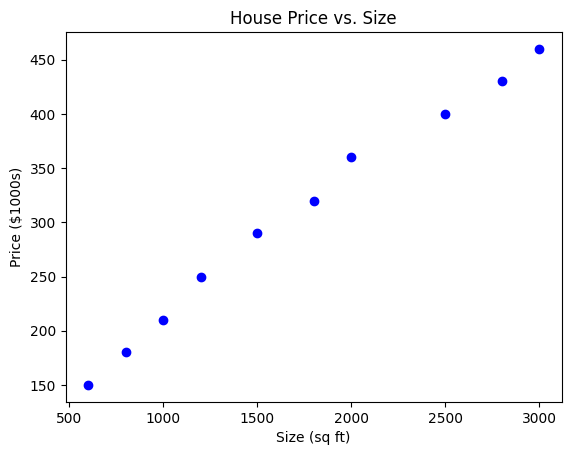

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = {
    "Size (sq ft)": [600, 800, 1000, 1200, 1500, 1800, 2000, 2500, 2800, 3000],
    "Price ($1000s)": [150, 180, 210, 250, 290, 320, 360, 400, 430, 460]
}

df = pd.DataFrame(data)

# Display first few rows
print(df.head())

# Scatter plot of data
plt.scatter(df["Size (sq ft)"], df["Price ($1000s)"], color='blue', marker='o')
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("House Price vs. Size")
plt.show()


In [2]:
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.

    X: Feature matrix (m x n)
    y: Target values (m x 1)
    theta: Model parameters (n x 1)

    Returns: Cost J(theta)
    """
    m = len(y)  # Number of training examples
    predictions = X.dot(theta)  # Hypothesis function (h_theta)
    errors = predictions - y  # Errors
    cost = (1 / (2 * m)) * np.sum(errors ** 2)  # MSE formula
    return cost


In [3]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    """
    Perform Gradient Descent to learn theta.

    X: Feature matrix
    y: Target values
    theta: Model parameters (initial guess)
    learning_rate: Step size
    iterations: Number of iterations

    Returns: Updated theta and cost history
    """
    m = len(y)  # Number of training examples
    cost_history = []  # Store cost per iteration

    for i in range(iterations):
        predictions = X.dot(theta)  # Compute predictions
        errors = predictions - y  # Calculate error

        # Update theta
        theta -= (learning_rate / m) * X.T.dot(errors)

        # Store cost for analysis
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history


In [4]:
# Prepare data for training
m = len(df)  # Number of examples
X = np.c_[np.ones(m), df["Size (sq ft)"]]  # Add intercept term (1s)
y = np.array(df["Price ($1000s)"]).reshape(m, 1)  # Convert to 2D array
theta = np.zeros((2, 1))  # Initialize theta (2 parameters: theta_0, theta_1)

# Hyperparameters
learning_rate = 0.0000001  # Step size
iterations = 1000  # Number of updates

# Train model using Gradient Descent
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

print(f"Final theta values: {theta_final}")


Iteration 0: Cost 21605.250604151868
Iteration 100: Cost 745.1392353672871
Iteration 200: Cost 745.1367782727601
Iteration 300: Cost 745.1343211870144
Iteration 400: Cost 745.1318641100488
Iteration 500: Cost 745.1294070418643
Iteration 600: Cost 745.1269499824592
Iteration 700: Cost 745.1244929318357
Iteration 800: Cost 745.1220358899923
Iteration 900: Cost 745.1195788569291
Final theta values: [[0.00164783]
 [0.16821132]]


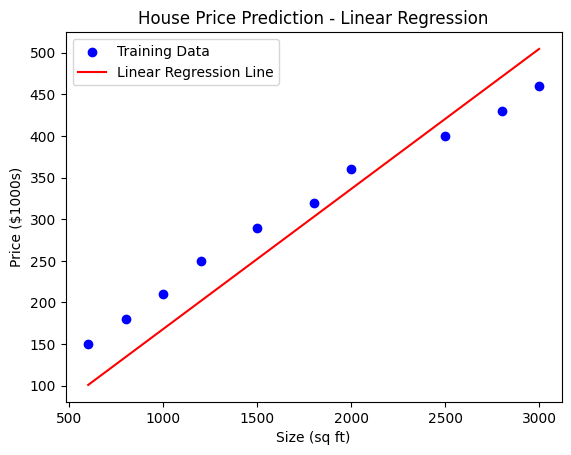

In [5]:
# Plot training data
plt.scatter(df["Size (sq ft)"], df["Price ($1000s)"], color='blue', label="Training Data")

# Plot regression line
X_values = np.linspace(min(df["Size (sq ft)"]), max(df["Size (sq ft)"]), 100)
y_values = theta_final[0] + theta_final[1] * X_values
plt.plot(X_values, y_values, color='red', label="Linear Regression Line")

plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.title("House Price Prediction - Linear Regression")
plt.show()


In [6]:
# Function to predict house price
def predict_price(size, theta):
    """
    Predicts house price for a given size using the trained theta.

    size: House size (sq ft)
    theta: Trained parameters

    Returns: Predicted price
    """
    size = np.array([1, size])  # Add intercept term
    return size.dot(theta)

# Predict for given sizes
sizes = [700, 2200, 3200]
for s in sizes:
    predicted_price = predict_price(s, theta_final)
    print(f"Predicted price for {s} sq ft house: ${predicted_price[0]*1000:.2f}")


Predicted price for 700 sq ft house: $117749.57
Predicted price for 2200 sq ft house: $370066.55
Predicted price for 3200 sq ft house: $538277.87


In [7]:
# Compute theta using Normal Equation
def normal_equation(X, y):
    """
    Compute theta using the Normal Equation.

    X: Feature matrix (with intercept term)
    y: Target values

    Returns: Optimal theta
    """
    theta_ne = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta_ne

# Compute theta
theta_ne = normal_equation(X, y)
print(f"Optimal theta (Normal Equation): \n{theta_ne}")

# Predict house prices using Normal Equation
for s in sizes:
    predicted_price_ne = predict_price(s, theta_ne)
    print(f"[Normal Equation] Predicted price for {s} sq ft house: ${predicted_price_ne[0]*1000:.2f}")


Optimal theta (Normal Equation): 
[[87.72840273]
 [ 0.1263207 ]]
[Normal Equation] Predicted price for 700 sq ft house: $176152.89
[Normal Equation] Predicted price for 2200 sq ft house: $365633.93
[Normal Equation] Predicted price for 3200 sq ft house: $491954.63
